<a href="https://colab.research.google.com/github/leonardohss0/sales-machine-learning-prophet/blob/main/sales_machine_learning_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [30]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [31]:
df = pd.read_csv('supermarket_sales.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [33]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [34]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [35]:
# Lista de colunas categóricas
cats = ['Invoice ID',
        'Branch', 
        'City', 
        'Customer type',
        'Gender',
        'Product line',
        'Date',
        'Time',
        'Payment'
       ]

In [36]:
# Lista de colunas numéricas
nums = ['Unit price', 
        'Quantity', 
        'Tax 5%', 
        'Total', 
        'cogs', 
        'gross margin percentage',
        'gross income',
        'Rating'
       ]

## Analysing the numeric variables
Analyzing numeric variables is crucial in a data science project because numerical data provides essential quantitative information. Here are a few reasons why analyzing numeric variables is important:

1. Understanding patterns and relationships: Numeric variables allow us to identify patterns and relationships within the data. Through statistical analysis, we can uncover correlations, trends, and dependencies among variables, helping us gain insights into the underlying phenomena.

2. Descriptive and summary statistics: Numeric variables enable the calculation of various descriptive statistics such as mean, median, standard deviation, and percentiles. These statistics summarize the central tendency, dispersion, and distribution of the data, providing a concise and meaningful description of the dataset.

3. Hypothesis testing and inferential statistics: Numeric variables are fundamental for hypothesis testing and making statistical inferences. By comparing means, proportions, or regression coefficients, we can assess the significance of relationships, test hypotheses, and make predictions based on the observed data.

4. Model building and prediction: Numeric variables are typically used as input features in machine learning and predictive modeling. Algorithms like linear regression, decision trees, and neural networks often require numerical inputs to build accurate models and make predictions on new data.

5. Visualization: Numeric variables can be visualized using various charts and graphs, aiding in data exploration and communication of insights. Histograms, scatter plots, box plots, and heatmaps are just a few examples of visualizations that can help understand the distribution, relationships, and outliers within numeric data.

Overall, analyzing numeric variables is essential for understanding the characteristics of the dataset, exploring relationships, building models, making predictions, and communicating findings. It forms the foundation of many data science techniques and plays a vital role in extracting valuable insights from data.

In [37]:
df[nums].describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


With this, we can infer that the `Unit price` column has a high standard deviation.

The distribution of columns `Unit price`, `Quantity`, `Tax 5%` and `Rating` seem to have a symmetrical distribution, as their mean and median are close.

The distribution of columns `Total`, `cogs` and `gross income` seem to be included to the right, as their mean is greater than the median.

<Axes: >

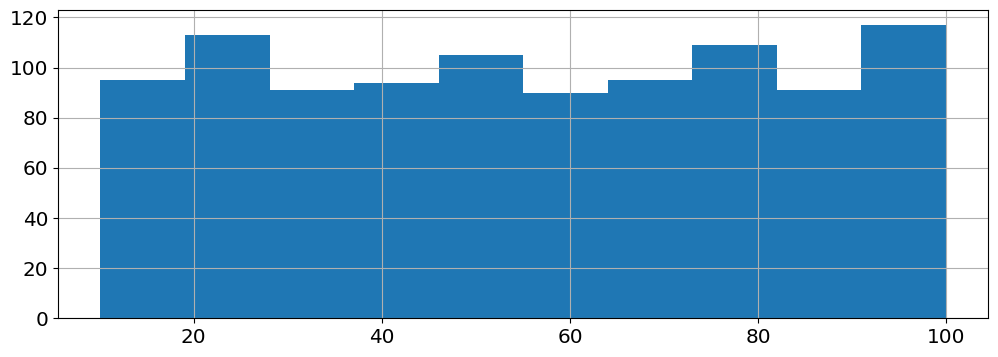

In [38]:
df['Unit price'].hist()

<Axes: >

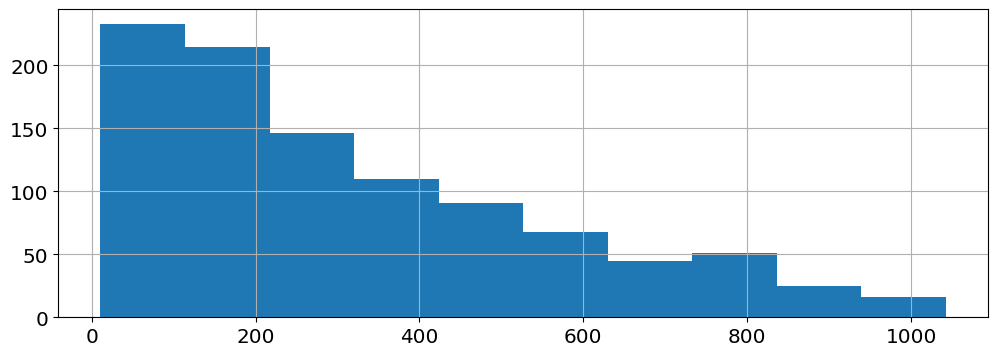

In [39]:
df['Total'].hist()

## Analysing the categorical variables
Analyzing categorical variables is important in a data science project for several reasons:

1. Understanding groupings and patterns: Categorical variables represent different groups or categories within a dataset. Analyzing these variables allows us to understand the distribution and frequencies of each category, providing insights into the composition and structure of the data.

2. Feature engineering and model building: Categorical variables often need to be transformed into numerical representations for machine learning algorithms to process them. This process, known as feature engineering, involves techniques such as one-hot encoding or label encoding. Analyzing categorical variables helps identify the most appropriate encoding methods and informs feature selection or creation.

3. Exploring associations and dependencies: Categorical variables can be analyzed to identify associations and dependencies between different categories. Techniques such as contingency tables and chi-square tests can reveal relationships, dependencies, and potential confounding factors between categorical variables.

4. Predictive modeling and classification: Categorical variables often serve as target variables in predictive modeling and classification tasks. Analyzing these variables helps us understand the distribution of classes or categories we are trying to predict, evaluate class imbalances, and select appropriate evaluation metrics for model performance.

5. Feature importance and variable selection: Analyzing categorical variables is important for determining their relevance and importance in predicting the outcome of interest. Techniques such as chi-square tests, information gain, or feature importance scores from tree-based models can guide variable selection and feature prioritization.

6. Visualization and communication: Categorical variables can be visualized using bar charts, pie charts, or stacked bar plots, facilitating the communication of insights and patterns to stakeholders. Visualizations of categorical variables help highlight differences between groups and present findings in an accessible manner.

In summary, analyzing categorical variables is essential for understanding groupings, identifying associations, feature engineering, predictive modeling, and effective communication of insights. It enables data scientists to extract meaningful information from categorical data and leverage it for various data science tasks.

In [40]:
df[cats].describe()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


With this, we can see some dominant classes

The `Branch 'A'`, the `City 'Yangon'`, the `Customer type 'Member'`, the `Gender 'Female'`, the `Product line 'Fashion accessories'` and the `Payment 'Ewallet'`

In [41]:
for col in cats:
    print(f'''Total of records by each categorical variable {col}:''')
    print(df[col].value_counts())
    print()

Total of records by each categorical variable Invoice ID:
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64

Total of records by each categorical variable Branch:
A    340
B    332
C    328
Name: Branch, dtype: int64

Total of records by each categorical variable City:
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Total of records by each categorical variable Customer type:
Member    501
Normal    499
Name: Customer type, dtype: int64

Total of records by each categorical variable Gender:
Female    501
Male      499
Name: Gender, dtype: int64

Total of records by each categorical variable Product line:
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         1

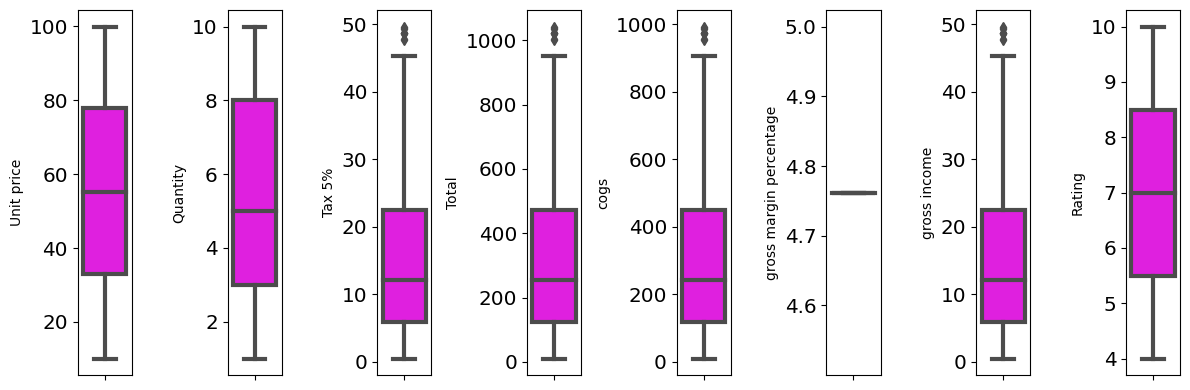

In [42]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

# Using prophet to predict sales performance

Prophet is a time series forecasting model developed by Facebook's Core Data Science team. It is designed to provide accurate and intuitive forecasts for univariate time series data with trends and seasonality.

Prophet incorporates several key features that make it popular among data scientists and analysts:

1. Flexibility: Prophet can handle a wide range of time series data, including irregularly spaced observations, missing values, and outliers. It can also handle multiple seasonality patterns, such as daily, weekly, and yearly cycles, which is particularly useful in analyzing data with recurring patterns.

2. Automatic changepoint detection: Prophet automatically detects changepoints in the time series, which are points where the underlying trend changes significantly. This allows the model to capture abrupt changes in the data, such as shifts in trends or seasonality.

3. Customizable seasonality: Prophet allows users to specify and customize seasonal components in the data. It provides flexibility in defining and modeling various seasonal patterns, including holidays and events that affect the time series.

4. Trend modeling: Prophet uses a piecewise linear model to capture the overall trend in the data, allowing it to handle both growth and decline patterns. It can also incorporate additional regressors to capture the impact of external factors on the time series.

5. Uncertainty estimation: Prophet provides uncertainty intervals for the forecasted values, which helps in understanding the potential range of future values. This is particularly valuable for decision-making and assessing the reliability of the forecasts.

6. User-friendly interface: Prophet is designed to be user-friendly and accessible to users without deep expertise in time series analysis. Its API is straightforward, and the model parameters are intuitive, making it easy to implement and experiment with.

Prophet has gained popularity for its ability to produce accurate and interpretable forecasts, particularly in business applications such as demand forecasting, inventory management, and resource planning. It combines the advantages of classical time series techniques with the flexibility and scalability of modern machine learning approaches.

In [43]:
# Convert the 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the DataFrame by date and count the distinct 'Invoice ID'
aggregated_df = df.groupby('Date')['Invoice ID'].nunique().reset_index()

# Rename the column to 'distinct_order_id'
aggregated_df = aggregated_df.rename(columns={'Date':'ds', 'Invoice ID': 'y'})
aggregated_df


,ds,y
0,2019-01-01,12
1,2019-01-02,8
2,2019-01-03,8
3,2019-01-04,6
4,2019-01-05,12
...,...,...
84,2019-03-26,13
85,2019-03-27,10
86,2019-03-28,10
87,2019-03-29,8


In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

m = Prophet()
m.fit(aggregated_df)

future = m.make_future_dataframe(periods=30)

In [46]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
114,2019-04-25,10.641856,6.201416,14.802915
115,2019-04-26,10.719104,6.146184,14.419638
116,2019-04-27,12.645992,8.464764,16.401610
117,2019-04-28,11.111599,6.848603,15.622651
118,2019-04-29,10.443877,6.256318,14.490874


In [47]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [48]:
plot_components_plotly(m, forecast)
